In [1]:
from typing import Pattern
import requests 
from bs4 import BeautifulSoup
import  re
import pandas as pd 
from  pandas import DataFrame,Series

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def Upper_case(dt):
    return str.upper(dt)

In [2]:
 Website_Page='https://gts.jo/components/ram'

Page_req=requests.get(Website_Page)

Page_Markup=BeautifulSoup(markup=Page_req.content,features='html.parser')

Rams_Grid=Page_Markup.find(class_='tb_wt tb_wt_products_system display-block tb_system_products')

Ram_info=Rams_Grid.find_all('h4')

Ram_Names=[Ram.text for Ram in Ram_info ]

del Ram_Names[10]
del Ram_Names[7]
############ Get Ram Prices###########

Ram_Prices_DIV=Rams_Grid.find_all(class_='product-thumb tb_style_1')


Ram_Prices=[Ram.find(class_='price-new').text for Ram in Ram_Prices_DIV]
del Ram_Prices[10]
del Ram_Prices[7]

In [3]:
Ram_Names
Matches=[]
Memory_Size_Pattern=re.compile(r'\d+GB')
for Ram in Ram_Names:
    Size=Memory_Size_Pattern.finditer(Ram)
    for match in Size:
         Matches.append(match)

Ram_Sizes=[ram.group(0) for ram in Matches ]

In [4]:
# Get Ram Speed  #
Ram_Speeds=[]
for Ram in Ram_Names:
    Ram_speed_Pattern=re.compile(r'\d+[\s\S][Mm-][Hh][Zz]')
    Ram_Speed=Ram_speed_Pattern.finditer(Ram)
    for m in Ram_Speed:
         Ram_Speeds.append(m.group(0))

for ram in Ram_Speeds:
    print(ram)

3200MHz
2666MHz
2666Mhz
3200MHz
3600MHz
2666Mhz
2666MHz
2666Mhz
1600MHz
2666MHz
1600MHz
1600MHz
1600MHz
1333 MHz


In [11]:
Ram_Names

['Ram HyperX 32GB Impact Gaming for Laptop 3200MHz',
 'Ram HyperX  32GB Impact Gaming for Laptop 2666MHz',
 'Kingston Ram 32GB 2666Mhz DDR4 for Laptop',
 'Ram HyperX Predator 16GB 3200MHz RGB',
 'Ram HyperX Predator 8GB 3600MHz RGB for PC',
 'Kingston Ram 16GB 2666Mhz DDR4 for Laptop',
 'Ram HyperX FURY 16GB 2666MHz For Pc',
 'Kingston Ram 4GB 2666Mhz DDR4 For Laptop',
 'Ram kingston for Laptop 8GB DDR3L 1600MHz ',
 'Kingston Ram 8GB 2666MHz DDR4 For Pc ',
 'Kingston Ram 8GB 1600MHz DDR3 For Pc ',
 'Kingston Ram 4GB 1600MHz 240-Pin DDR3L For Pc ',
 'Kingston Ram 4GB 1600MHz 240-Pin DDR3 For Pc ',
 'Kingston Ram 4GB 1333 MHz 240-Pin DDR3 For Pc ']

In [12]:
GTS_Ram_DT=DataFrame({'Ram Name':Ram_Names,'Ram Speed':Ram_Speeds,
                      'Ram Size':Ram_Sizes,'Ram Price':Ram_Prices})

In [13]:
GTS_Ram_DT['Ram Price']=GTS_Ram_DT['Ram Price'].str.replace('JOD','')

# Reshaping Columns

In [14]:
GTS_Ram_DT['Ram Price']=pd.to_numeric(GTS_Ram_DT['Ram Price'])




In [15]:
GTS_Ram_DT['Ram Speed']=GTS_Ram_DT['Ram Speed'].apply(Upper_case)
GTS_Ram_DT['Ram Speed']=GTS_Ram_DT['Ram Speed'].str.replace('MHZ','')
GTS_Ram_DT['Ram Speed']=pd.to_numeric(GTS_Ram_DT['Ram Speed'])

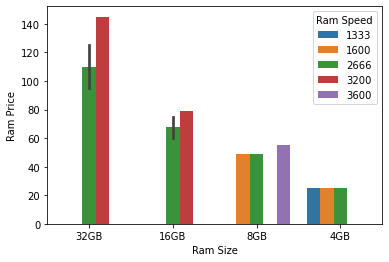

In [16]:
sns.barplot(x='Ram Size',y='Ram Price',data=GTS_Ram_DT,hue='Ram Speed')

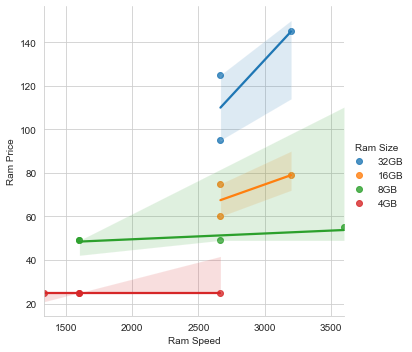

In [18]:
sns.set_style('whitegrid')
sns.lmplot('Ram Speed','Ram Price',GTS_Ram_DT,hue='Ram Size')

In [69]:
GTS_Ram_DT

,Ram Name,Ram Speed,Ram Size,Ram Price
0,Ram HyperX 32GB Impact Gaming for Laptop 3200MHz,3200,32GB,145.0
1,Ram HyperX 32GB Impact Gaming for Laptop 2666MHz,2666,32GB,125.0
2,Kingston Ram 32GB 2666Mhz DDR4 for Laptop,2666,32GB,95.0
3,Ram HyperX Predator 16GB 3200MHz RGB,3200,16GB,79.0
4,Ram HyperX Predator 8GB 3600MHz RGB for PC,3600,8GB,55.0
5,Kingston Ram 16GB 2666Mhz DDR4 for Laptop,2666,16GB,75.0
6,Ram HyperX FURY 16GB 2666MHz For Pc,2666,16GB,60.0
7,Kingston Ram 4GB 2666Mhz DDR4 For Laptop,2666,4GB,25.0
8,Ram kingston for Laptop 8GB DDR3L 1600MHz,1600,8GB,49.0
9,Kingston Ram 16GB 2666 MHz DDR4 For Pc,2666,16GB,75.0
